# Problem statement
Cardiovascular diseases are the leading cause of death globally. 
It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. 

## Task to be performed

1. Preliminary analysis
    1. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
    1. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 50)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("cep1_dataset.xlsx")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1.A- preliminary data inspection

In [3]:
df.shape

(303, 14)

In [4]:
# The dataframe has 303 rows and 14 features

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# No missing values in the data

In [7]:
# Check for duplicates
dups = df.duplicated(keep='first')
print(dups.value_counts())
print(dups[dups == True])

False    302
True       1
dtype: int64
164    True
dtype: bool


In [8]:
# remove duplicate row
df=df[~dups]

In [9]:
df.shape

(302, 14)

## 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
    - a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
    - b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 
    - c. Study the occurrence of CVD across the Age category
    - d. Study the composition of all patients with respect to the Sex category
    - e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
    - f. Describe the relationship between cholesterol levels and a target variable
    - g. State what relationship exists between peak exercising and the occurrence of a heart attack
    - h. Check if thalassemia is a major cause of CVD
    - i. List how the other factors determine the occurrence of CVD
    - j. Use a pair plot to understand the relationship between all the given variables


### 2.a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [10]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [11]:
df[['age','trestbps','chol','thalach','oldpeak']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


### 2.b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

In [12]:
# Create a new temp dataframe for categorical columns
df_cat = df.filter(['sex', 'cp', 'exang', 'thal','Target'], axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


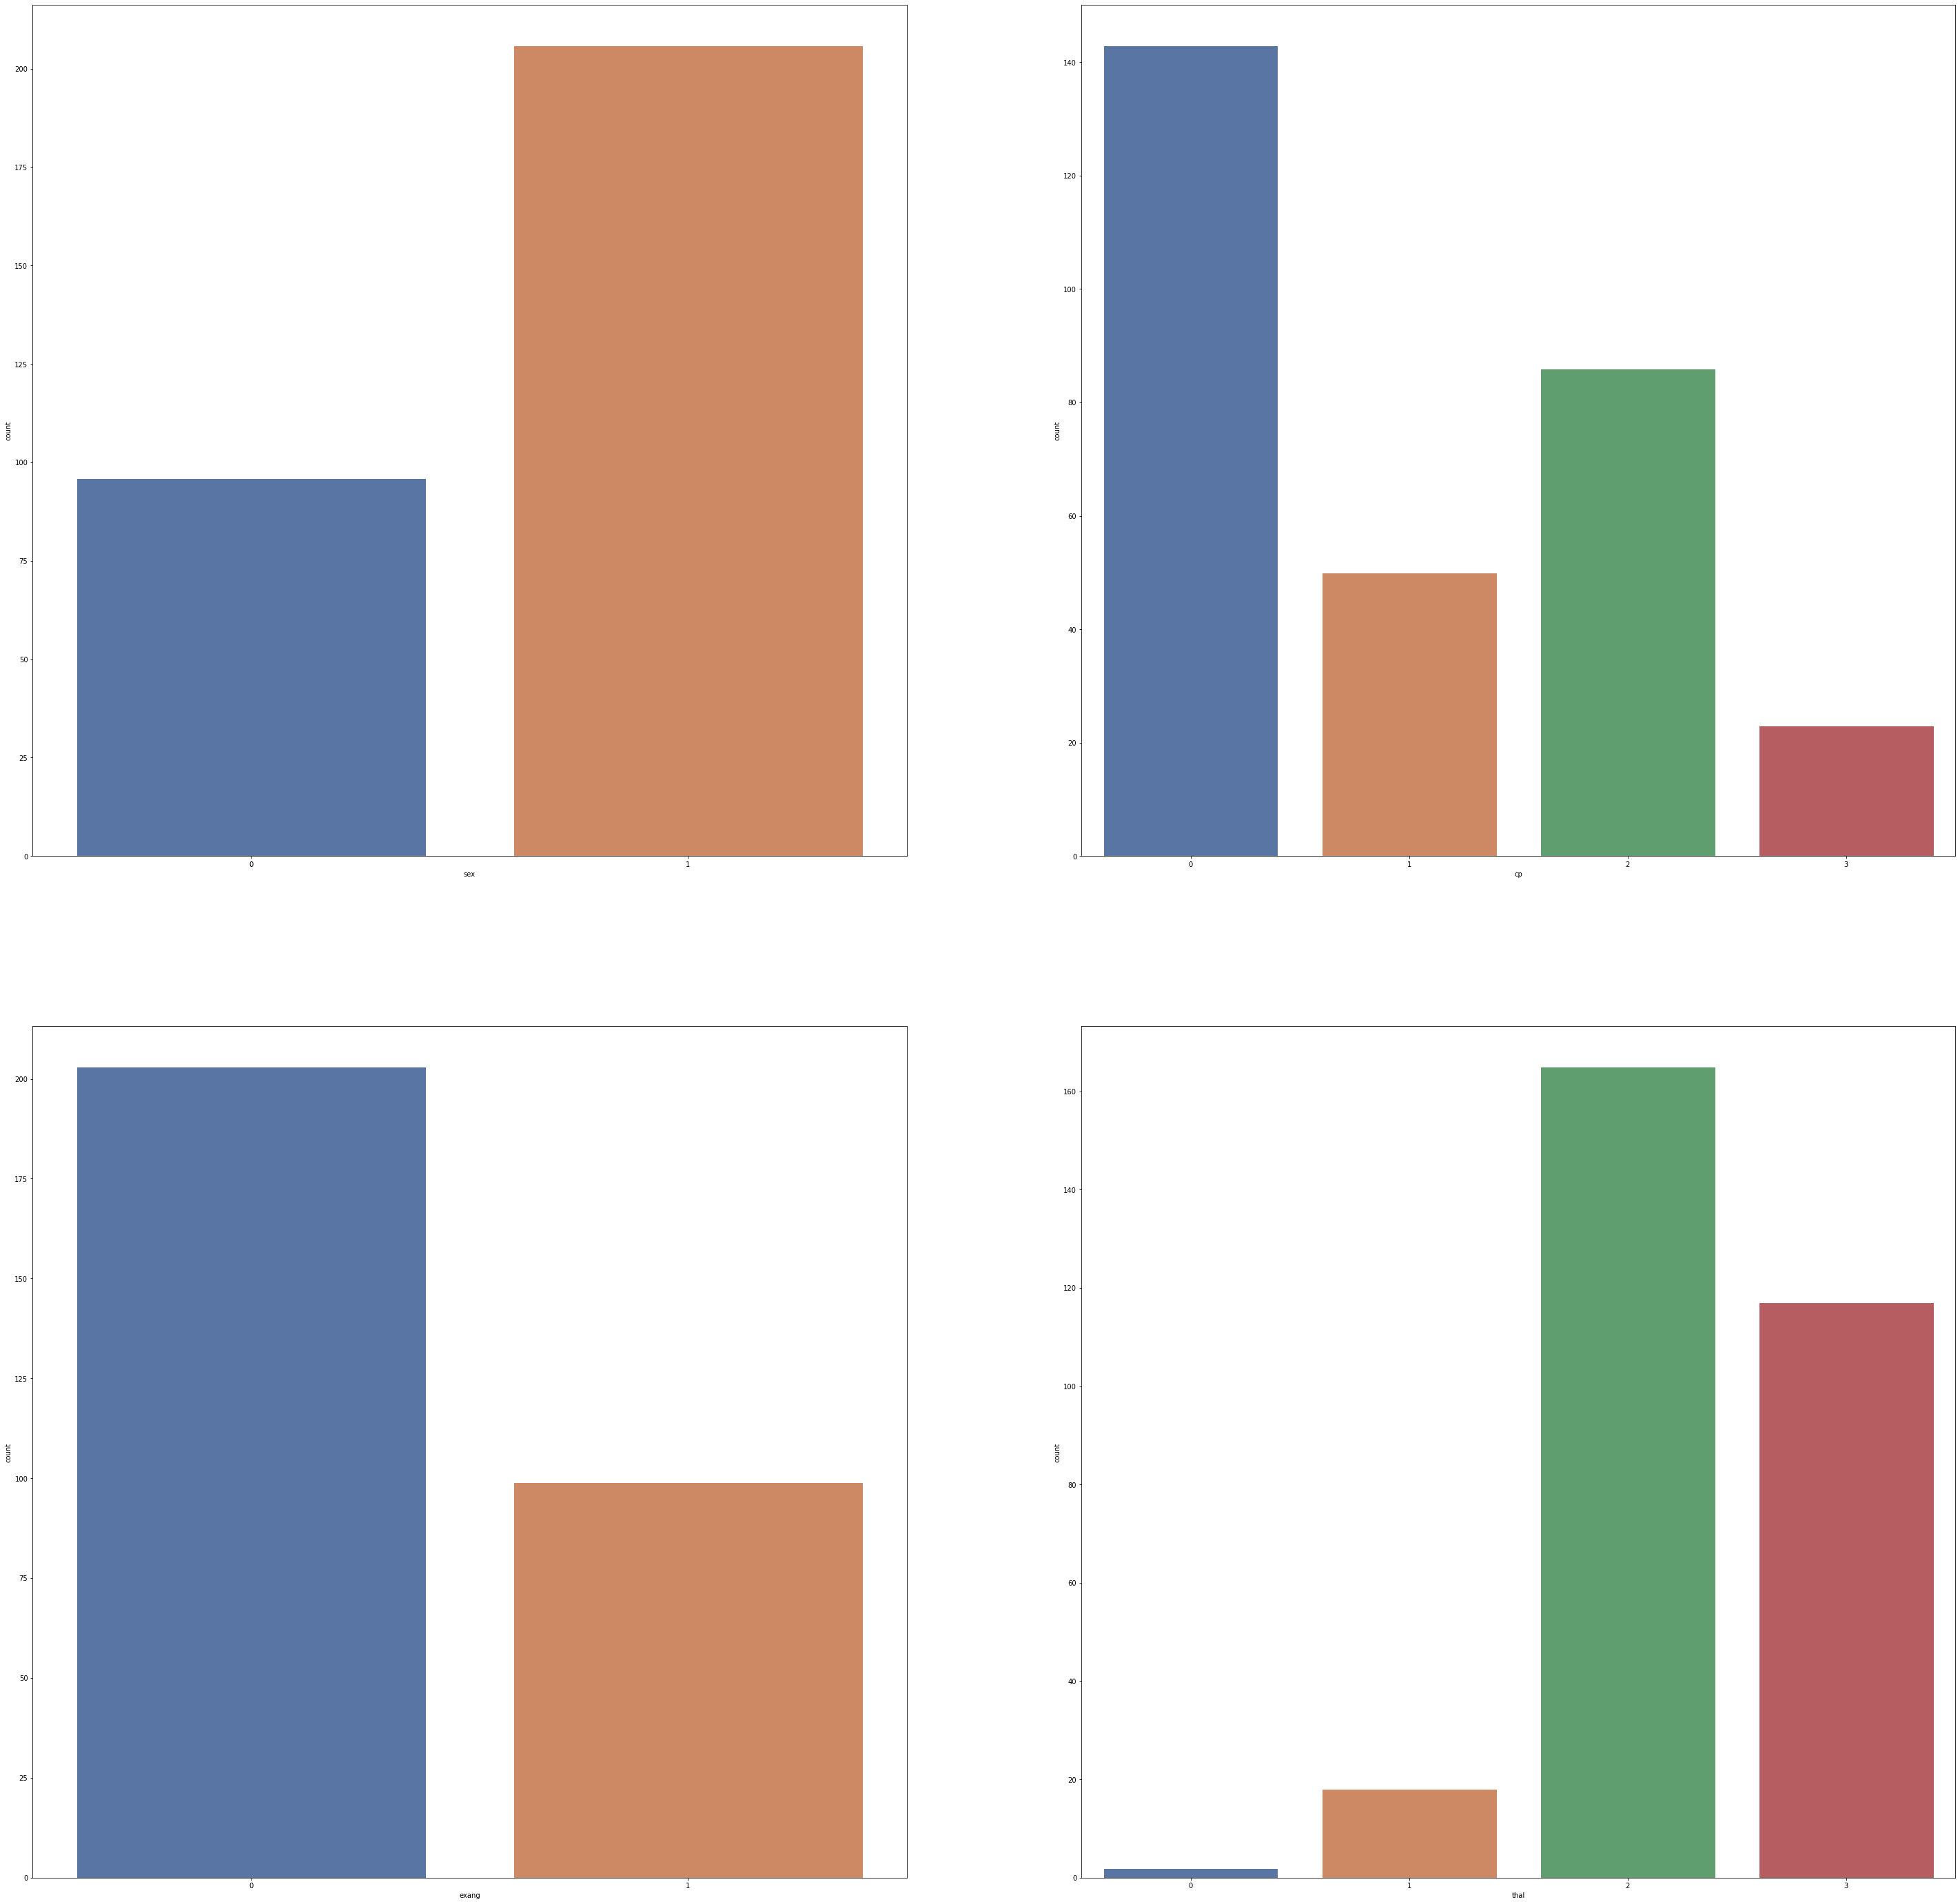

In [14]:
# For loop to generate seaborn count plots for categorical features
fig , ax = plt.subplots(2,2,figsize = (50,50))
sns.set(font_scale = 1.5)
for i , subplots in zip (df_cat , ax.flatten()):
    
    sns.countplot(df_cat[i],ax = subplots)
plt.show()

### 2.c. Study the occurrence of Cardio Vascular Disease (CVD) across the Age category

In [15]:
df.groupby(['target'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,56.601449,7.962082,35.0,52.00,58.0,62.0,77.0
1,164.0,52.585366,9.511957,29.0,44.75,52.0,59.0,76.0


In [16]:
age_target=df.groupby("target")["age"].value_counts(ascending=False,bins=4)
age_target

target                             
0       (56.0, 66.5]                   70
        (45.5, 56.0]                   39
        (34.957, 45.5]                 16
        (66.5, 77.0]                   13
1       (40.75, 52.5]                  71
        (52.5, 64.25]                  60
        (64.25, 76.0]                  21
        (28.951999999999998, 40.75]    12
Name: age, dtype: int64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

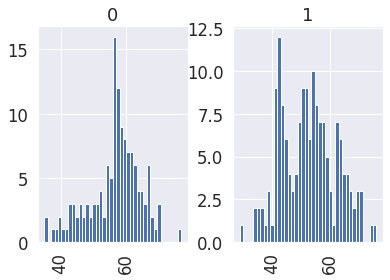

In [17]:
df['age'].hist(by=df['target'],bins=40)

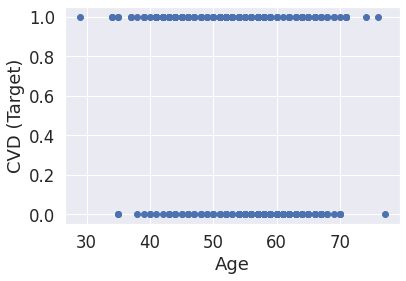

In [18]:
# Scatter plot y=target, x=age
plt.scatter(df['age'], df['target'])
plt.xlabel("Age")
plt.ylabel("CVD (Target)")
plt.show()

In [19]:
# Age does not seem to be a predictor of CVD
# Their mean age, although not the same, are close across the target

In [20]:
# Drop age from data frame
# df.drop(['age'], axis=1, inplace=True)

In [21]:
df.shape

(302, 14)

### 2.d. Study the composition of all patients with respect to the Sex category

In [22]:
#rename sex column
#1=Male;0=female
df.rename(columns={'sex': 'sex_male'}, inplace=True)

In [23]:
df['sex_male'].value_counts()

1    206
0     96
Name: sex_male, dtype: int64

In [24]:
male_target=df.groupby("target")["sex_male"].value_counts(ascending=False, normalize=True)*100
male_target

target  sex_male
0       1           82.608696
        0           17.391304
1       1           56.097561
        0           43.902439
Name: sex_male, dtype: float64

In [25]:
# There seems to be an imbalance of data collected by sex where men are represented about twice that of women
# I will attempt to balance the data using downsampling
df_majority = df[df.sex_male==1]
df_minority = df[df.sex_male==0]

In [26]:
#down sample majority class (sex_male=1)
#use random_state = 123 so that you can reproduce results later
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=96,     # to match minority class
                                 random_state=123) # reproducible results

In [27]:
#combine majority and minority data
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [28]:
df_downsampled['sex_male'].value_counts()

1    96
0    96
Name: sex_male, dtype: int64

In [29]:
# re-examine again using this new resampled data frame
male_target=df_downsampled.groupby("target")["sex_male"].value_counts(ascending=False, normalize=True)*100
male_target

target  sex_male
0       1           69.620253
        0           30.379747
1       0           63.716814
        1           36.283186
Name: sex_male, dtype: float64

In [30]:
pd.crosstab(index=df_downsampled['sex_male'], columns=df_downsampled['target'])

target,0,1
sex_male,,
0,24,72
1,55,41


In [31]:
pd.crosstab(index=df_downsampled['sex_male'], columns=df_downsampled['target'],normalize=True,margins=True,margins_name='Total')*100

target,0,1,Total
sex_male,,,
0,12.500000,37.500000,50.0
1,28.645833,21.354167,50.0
Total,41.145833,58.854167,100.0


In [32]:
# We can see more clearly how sex plays a role in CVD
# 58% of the patients have been flagged as having CVD
# Of that 58%, females makeup 37.5% while males makeup 21.4%
# This seams counter intuitive since I thought that men are at higher risk for CVD
# But I will opt to go with this balanced data

### 2.e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

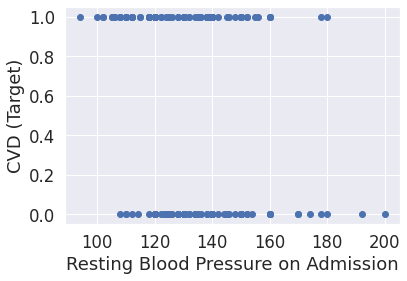

In [33]:
# scatter plot

plt.scatter(df_downsampled['trestbps'], df_downsampled['target'])
plt.xlabel("Resting Blood Pressure on Admission")
plt.ylabel("CVD (Target)")
plt.show()

In [34]:
df_downsampled.groupby(['target'])['trestbps'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,79.0,138.594937,18.326469,108.0,125.5,135.0,149.0,200.0
1,113.0,129.362832,15.738977,94.0,120.0,130.0,140.0,180.0


In [35]:
# Resting blood pressure analysis
# There does not seem to be a correlation of anomalies of resting blood pressure to CVD

### 2.f. Describe the relationship between cholesterol levels and a target variable

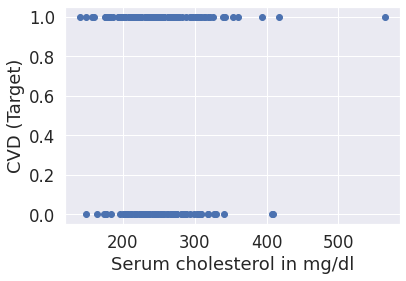

In [36]:
plt.scatter(df_downsampled['chol'], df_downsampled['target'])
plt.xlabel("Serum cholesterol in mg/dl")
plt.ylabel("CVD (Target)")
plt.show()

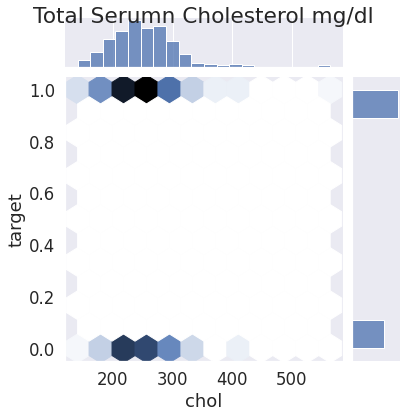

In [37]:
s = sns.jointplot(x='chol', y='target', data=df_downsampled, kind="hex");
s.ax_joint.grid(False);
s.ax_marg_y.grid(False);
s.fig.suptitle("Total Serumn Cholesterol mg/dl");

In [38]:
#Test creating an age_band column
#age_group_data=df_downsampled.filter(['age'], axis = 1)
#print(age_group_data)
#age_group_data['age_band'] = pd.cut(age_group_data['age'], bins=[20, 30, 40, 50, 60, 70, float('Inf')], labels=['20-29','30-39','40-49', '50-59', '60-69', '70-79'], right = False)
#pd.set_option('display.max_rows', None)
#print(age_group_data)

In [39]:
df_downsampled.groupby(['target'])['chol'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,79.0,253.037975,48.475064,149.0,220.5,249.0,282.0,409.0
1,113.0,250.902655,58.618464,141.0,213.0,244.0,277.0,564.0


In [40]:
#Apply tested code
df_downsampled['age_band']=pd.cut(df_downsampled['age'], bins=[20, 30, 40, 50, 60, 70, float('Inf')], labels=['20-29','30-39','40-49', '50-59', '60-69', '70-79'], right = False)

In [41]:
df_downsampled.groupby(['target','age_band'])['chol'].describe()

count        mean        std    min     25%    50%     75%  \
target age_band                                                               
0      30-39       1.0  231.000000        NaN  231.0  231.00  231.0  231.00   
       40-49      10.0  248.200000  57.344573  149.0  225.00  251.5  274.75   
       50-59      35.0  254.485714  48.980411  177.0  217.00  249.0  284.50   
       60-69      30.0  254.100000  46.311055  164.0  228.25  250.5  268.75   
       70-79       3.0  249.000000  67.268120  174.0  221.50  269.0  286.50   
1      20-29       1.0  204.000000        NaN  204.0  204.00  204.0  204.00   
       30-39       8.0  213.125000  46.639767  175.0  182.75  204.5  216.25   
       40-49      36.0  234.527778  40.536746  141.0  212.00  239.0  263.50   
       50-59      37.0  258.432432  44.426932  186.0  221.00  256.0  294.00   
       60-69      25.0  280.440000  85.977264  177.0  226.00  269.0  313.00   
       70-79       6.0  237.833333  55.564077  149.0  209.00  255.0  268.00   

                   max  
target age_band         
0      30-39     231.0  
       40-49     341.0  
       50-59     409.0  
       60-69     407.0  
       70-79     304.0  
1      20-29     204.0  
       30-39     321.0  
       40-49     315.0  
       50-59     354.0  
       60-69     564.0  
       70-79     302.0

In [42]:
df_downsampled.head()

,age,sex_male,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_band
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,50-59
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0,50-59
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0,50-59
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0,40-49
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0,50-59


In [43]:
# It does not seem cholesterol is a good predictor for CVD
# The means by target are close CVD:251 mg/dl vs non-CVD:253 mg/dl

### 2.g. State what relationship exists between peak exercising and the occurrence of a heart attack

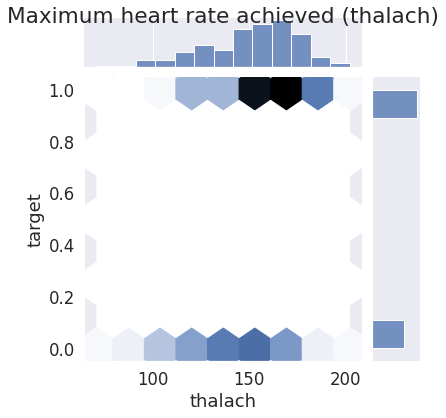

In [44]:
# thalach
s = sns.jointplot(x='thalach', y='target', data=df_downsampled, kind="hex");
s.ax_joint.grid(False);
s.ax_marg_y.grid(False);
s.fig.suptitle("Maximum heart rate achieved (thalach)");

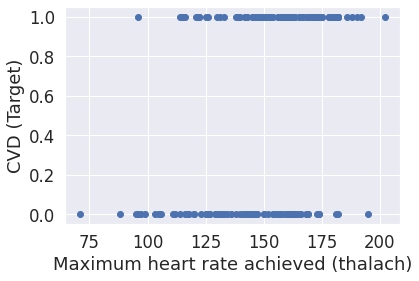

In [45]:
plt.scatter(df_downsampled['thalach'], df_downsampled['target'])
plt.xlabel("Maximum heart rate achieved (thalach)")
plt.ylabel("CVD (Target)")
plt.show()

In [46]:
df_downsampled.groupby(['target'])['thalach'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,79.0,139.810127,24.584275,71.0,125.0,143.0,159.5,195.0
1,113.0,158.672566,19.172824,96.0,150.0,162.0,172.0,202.0


In [47]:
# There seems to be a relationship between the maximum heart rate achieved during exercise and whether a patient is flagged with CVD
# The charts and stats show us higher heart rates for patients flagged as having CVD

### 2.h. Check if thalassemia is a major cause of CVD

In [48]:
#thal: 
# 1 = fixed defect (no blood flow in some part of the heart); 
# 2 = normal blood flow; 
# 3 = reversable defect (a blood flow is observed but it is not normal) 

In [49]:
df_downsampled_dummies = pd.get_dummies(df_downsampled, columns = ['thal','cp', 'restecg'])
df_downsampled_dummies.head()

,age,sex_male,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,thal_1,thal_2,thal_3,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
268,54,1,122,286,0,116,1,3.2,1,2,...,0,1,0,1,0,0,0,1,0,0
244,56,1,132,184,0,105,1,2.1,1,1,...,1,0,0,1,0,0,0,1,0,0
202,58,1,150,270,0,111,1,0.8,2,0,...,0,0,1,1,0,0,0,1,0,0
245,48,1,124,274,0,166,0,0.5,1,0,...,0,0,1,1,0,0,0,1,0,0
276,58,1,146,218,0,105,0,2.0,1,1,...,0,0,1,1,0,0,0,0,1,0


In [50]:
df_downsampled_dummies.groupby(['target'])['thal_3'].value_counts()

target  thal_3
0       1          49
        0          30
1       0         100
        1          13
Name: thal_3, dtype: int64

###  2.i. List how the other factors determine the occurrence of CVD

<AxesSubplot:>

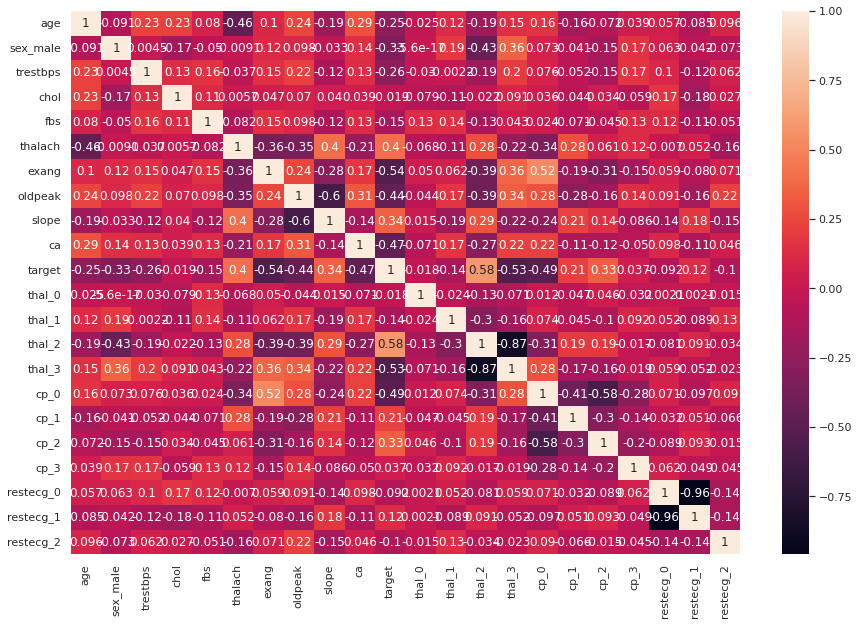

In [51]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.set(style = 'white', color_codes = True)
sns.set(font_scale = 1)
sns.heatmap(df_downsampled_dummies.corr(),annot=True)

In [52]:
pd.set_option('display.max_rows', None)
df_downsampled_dummies.corr()['target'].sort_values(ascending=False)

target       1.000000
thal_2       0.577418
thalach      0.397196
slope        0.341844
cp_2         0.334816
cp_1         0.212596
restecg_1    0.120198
cp_3         0.037063
thal_0      -0.018460
chol        -0.019313
restecg_0   -0.091527
restecg_2   -0.100349
thal_1      -0.137443
fbs         -0.147831
age         -0.248646
trestbps    -0.261607
sex_male    -0.328102
oldpeak     -0.439828
ca          -0.465733
cp_0        -0.490644
thal_3      -0.531687
exang       -0.536278
Name: target, dtype: float64

###  Select colums for modeling that have correlation >= 0.2

In [53]:
df_model_data = ["thal_2", "thalach", "slope", "cp_2", "cp_1", "target"]
df_model_data = df_downsampled_dummies.reindex(columns=df_model_data)
df_model_data.head()

,thal_2,thalach,slope,cp_2,cp_1,target
268,1,116,1,0,0,0
244,0,105,1,0,0,0
202,0,111,2,0,0,0
245,0,166,1,0,0,0
276,0,105,1,0,0,0


### 2.j. Use a pair plot to understand the relationship between all the given variables

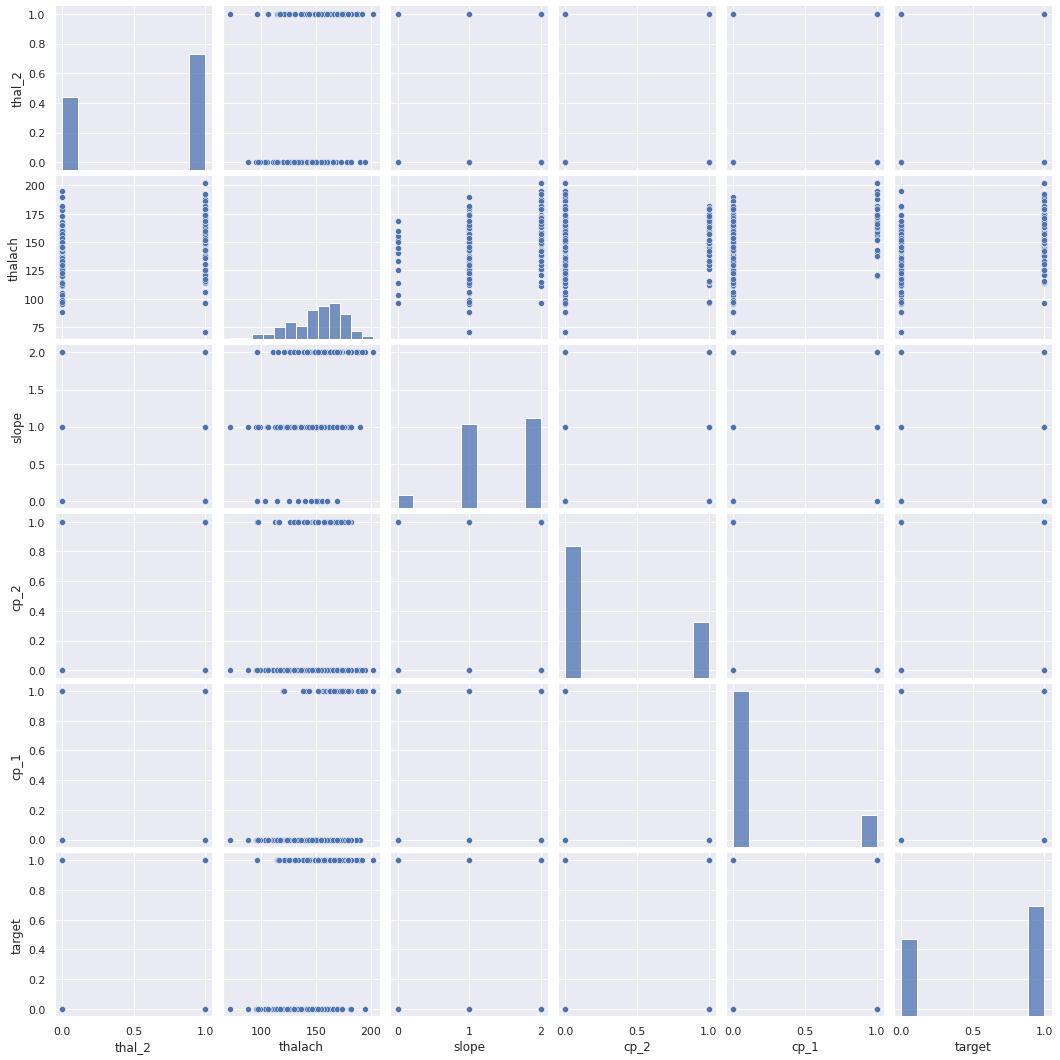

In [54]:
# Not helpful for binary features. 
# But can see a relationship between thalch and target where higher heart rates achieved are more associated with CVD
# than lower heart rates.
sns.pairplot(df_model_data)
plt.show()

## 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [103]:
# Model building imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

from sklearn import metrics

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [124]:
# Prepare data for model
X = df.drop('target',axis=1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# Check the shape of each
print('X_train: ',  X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (211, 13)
X_test:  (91, 13)
y_train:  (211,)
y_test:  (91,)


In [125]:
LogReg = LogisticRegression()
model_lg=LogReg.fit(X_train, y_train)

In [126]:
y_pred_lg = model_lg.predict(X_test)

In [127]:
cf_matrix = confusion_matrix(y_test, y_pred_lg)

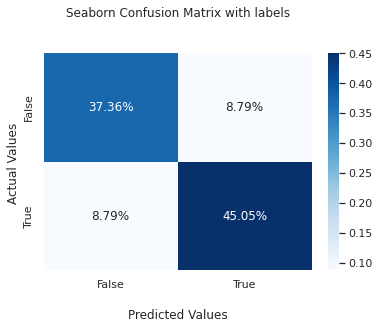

In [128]:
# Visualize the confusion matrix
# ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
# As percentages
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues') 

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [117]:
print('Accuracy Score for Logistic Regression: ',
      round(accuracy_score(y_test,y_pred_lg),5)*100,'%')

Accuracy Score for Logistic Regression:  82.418 %


In [118]:
print(classification_report(y_test, y_pred_lg)) 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [119]:
# ROC
from sklearn.metrics import roc_auc_score,roc_curve
y_prob = model_lg.predict_proba(X_test)[:,1]
false_pos_rate,true_pos_rate,threshold = roc_curve(y_test,y_prob)

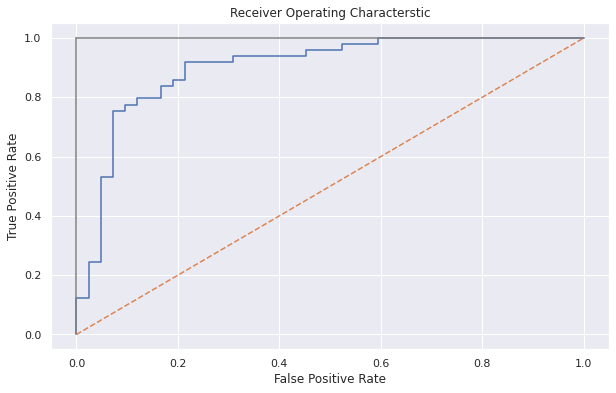

In [120]:
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characterstic')
plt.plot(false_pos_rate,true_pos_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [121]:
# What is the area under the curve?
roc_auc_score(y_test,y_prob)

0.9008746355685131

### Random Forest Classifier using downsampled data (gender balanced data)

In [152]:
#Trying with downsampled dataframe without dummy variables and dropping age band
RFC = RandomForestClassifier()
X = df_downsampled.drop(['target', 'age_band'],axis=1)
#X = df_model_data.drop(['target'],axis=1)
y = df_downsampled['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [153]:
param_grid = {'n_estimators':[100,150,200,250],'max_depth':[4,6,8]}
tuning = GridSearchCV(estimator=RFC, param_grid=param_grid, scoring='r2')
model_rfc=tuning.fit(X_train,y_train)
y_pred_rfc = model_rfc.predict(X_test)
tuning.best_params_,tuning.best_score_

({'max_depth': 4, 'n_estimators': 200}, 0.5184981684981685)

In [154]:
print('classification_report:\n',classification_report(y_test, y_pred_rfc))
confusion_matrix(y_test, y_pred_rfc)

classification_report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           1       0.86      0.88      0.87        41

    accuracy                           0.81        58
   macro avg       0.77      0.76      0.77        58
weighted avg       0.81      0.81      0.81        58



array([[11,  6],
       [ 5, 36]])

### Random Forest Classifier using original data

In [99]:
RFC = RandomForestClassifier()
param_grid = {'n_estimators':[100,150,200,250],'max_depth':[4,6,8]}
GSCV = GridSearchCV(estimator=RFC, param_grid=param_grid, scoring='r2')

X = df.drop('target',axis=1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [100]:
model_rfc=GSCV.fit(X_train,y_train)
y_pred_rfc = model_rfc.predict(X_test)
GSCV.best_params_,GSCV.best_score_

({'max_depth': 4, 'n_estimators': 200}, 0.3506636155606406)

In [97]:
print('Classification Report:\n',classification_report(y_test, y_pred_rfc))
confusion_matrix(y_test, y_pred_rfc)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.85      0.92      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



array([[34,  8],
       [ 4, 45]])

In [ ]:
## Accuracy Score is better using the original data. Gender balancing the data was not a good idea. 